Linear Regression Performance (Regression Metrics):
Mean Absolute Error (MAE): 6.338558247813267
Mean Squared Error (MSE): 57.667456573732004
Root Mean Squared Error (RMSE): 7.593909176026008
R² Score (Regression Accuracy): 0.017174454180048704

Classification Metrics (Based on Binarized Predictions):
Accuracy: 0.6359832635983264
Precision: 0.8780487804878049
Recall: 0.3050847457627119
F1 Score: 0.45283018867924535


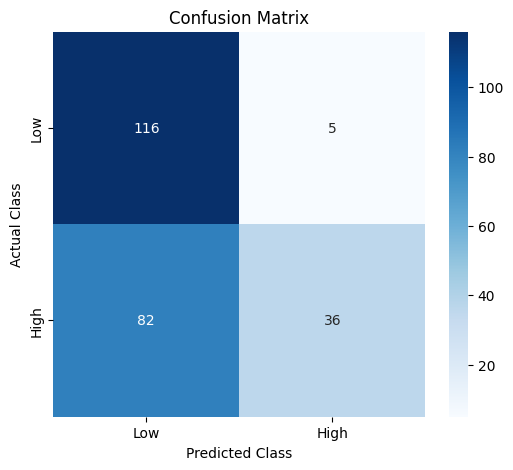

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

df = pd.read_csv("Delhi_temp.csv")

if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time')
    df['Day'] = (df['time'] - df['time'].min()).dt.days
else:
    print("Column 'time' not found. Using row index as 'Day'.")
    df['Day'] = range(len(df))

if 'temperature_2m_max' not in df.columns:
    raise KeyError("Column 'temperature_2m_max' not found in the CSV file")

X = df[['Day']]
y = df['temperature_2m_max']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance (Regression Metrics):")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score (Regression Accuracy):", r2)

threshold = np.median(y_test)

y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

cm = confusion_matrix(y_test_class, y_pred_class)
acc = accuracy_score(y_test_class, y_pred_class)
prec = precision_score(y_test_class, y_pred_class, zero_division=0)
rec = recall_score(y_test_class, y_pred_class, zero_division=0)
f1 = f1_score(y_test_class, y_pred_class, zero_division=0)

print("\nClassification Metrics:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

Epoch 1/20
60/60 [==============================] - 4s 5ms/step - loss: 0.1941
Epoch 2/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 3/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 4/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 5/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 6/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 7/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 8/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 9/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 10/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 11/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 12/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 13/20
60/60 [==============================

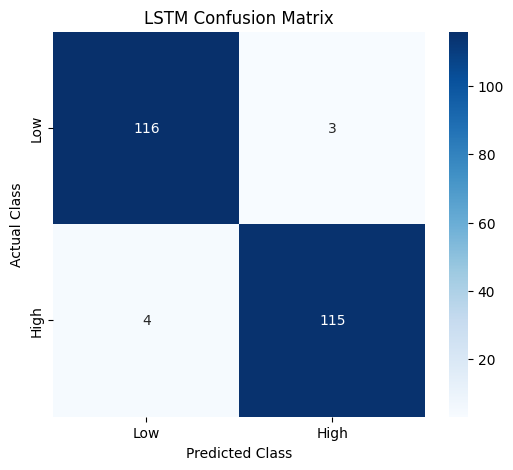

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, 
                             confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv("Delhi_temp.csv")

if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time')
else:
    print("Column 'time' not found. Proceeding without date-based sorting.")

if 'temperature_2m_max' not in df.columns:
    raise KeyError("Column 'temperature_2m_max' not found in the CSV file")

data = df[['temperature_2m_max']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X_lstm, y_lstm = create_sequences(scaled_data, seq_length)

train_size = int(len(X_lstm) * 0.8)
X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
y_train, y_test = y_lstm[:train_size], y_lstm[train_size:]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

y_pred_scaled = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred)

print("LSTM Regression Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

threshold = np.median(y_test_inv)
y_test_class = (y_test_inv > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

cm = confusion_matrix(y_test_class, y_pred_class)
acc = accuracy_score(y_test_class, y_pred_class)
prec = precision_score(y_test_class, y_pred_class, zero_division=0)
rec = recall_score(y_test_class, y_pred_class, zero_division=0)
f1 = f1_score(y_test_class, y_pred_class, zero_division=0)

print("\nLSTM Classification Metrics:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("LSTM Confusion Matrix")
plt.show()
